In [1]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Interactive color selection with simple Dash example'),
    html.P("Select color:"),
    dcc.Dropdown(
        id="dropdown",
        options=['Gold', 'MediumTurquoise', 'LightGreen'],
        value='Gold',
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input("dropdown", "value"))
def display_color(color):
    fig = go.Figure(
        data=go.Bar(y=[2, 3, 1], # replace with your own data source
                    marker_color=color))
    return fig


app.run_server(debug=True)

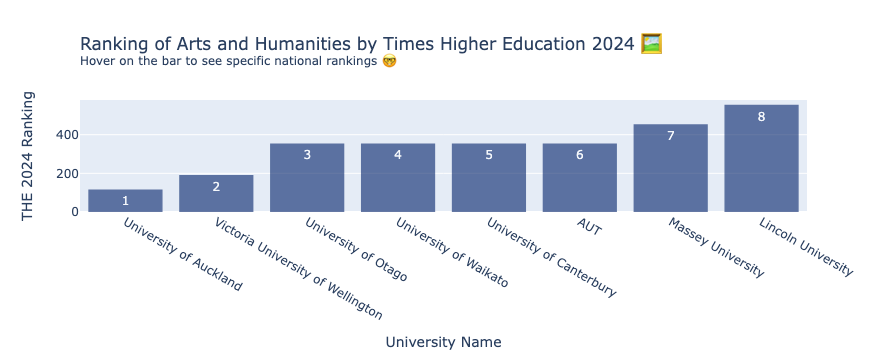

In [2]:
import pandas as pd
import plotly.graph_objects as go

Subject=['Arts and humanities']

df = pd.read_csv('Uni-Dataset.csv',
                 header=0,
                 usecols=["University Name", "Arts and humanities ranking THE2024"])
# Melt the dataframe to make it suitable for plotting
df_melted = df.melt(id_vars=["University Name"], 
                    value_vars=["Arts and humanities ranking THE2024"],
                    var_name="Subject", value_name="Subject Field")

# y values for the direct labels to show the national rankings
y=[1, 3, 7, 2, 4, 5, 8, 6]


fig = go.Figure(data=[
    go.Bar(
        x=df['University Name'], 
        y=df['Arts and humanities ranking THE2024'],
        hovertext=[
            '1st place nationally, Ranked 113 in the world by THE 2024', 
            '=3rd place nationally, Ranked 350.5 in the world by THE 2024', 
            '4th place nationally, Ranked 450.5 in the world by THE 2024',
            '2nd place nationally, Ranked 188 in the world by THE 2024',
            '=3rd place nationally, Ranked 350.5 in the world by THE 2024',
            '=3rd place nationally, Ranked 350.5 in the world by THE 2024',
            '5th place nationally, Ranked 550.5 in the world by THE 2024',
            '=3rd place nationally, Ranked 350.5 in the world by THE 2024'
        ],
        text=y,  # Displaying the ranking as number on the bar
        textposition='auto'
    )
])


# Change the bar mode
# smallest ranking to largest ranking
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})

# fig.update_layout(barmode='group')
fig.update_layout(
    title_text='Ranking of Arts and Humanities by THE 2024',
    barmode='group',
    xaxis_title="University Name",
    yaxis_title="THE 2024 Ranking"
),
fig.update_layout(
    title=go.layout.Title(
        text="Ranking of Arts and Humanities by Times Higher Education 2024 🖼️<br><sup>Hover on the bar to see specific national rankings 🤓</sup>",
        xref="paper",
        x=0
    ),)


fig.update_traces(marker_color='rgb(1,33,105)', marker_line_color='rgb(1,33,105)',
                  marker_line_width=1.5, opacity=0.6)


fig.show() 